<h2 align = center> Linear Regression Assignment:</h2>
<h3 align = center> Prediction of bike rental daily count based on environmental and seasonal settings</h3>



### Problem Statement:
- The company wants to know:
    - Which variables are significant in predicting the demand for shared bikes?
    - How well those variables describe the bike demands
    
### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables.
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Approach
- **Data Preparation:**
     - Variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary).Convert such feature values into categorical string values before proceeding with model building.
     - The column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. Since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction.
- **Model Building:**
     - The model should be built taking this 'cnt' as the target variable.
- **Model Evaluation:**
     - from sklearn.metrics import r2_score >>> r2_score(y_test, y_pred)
     - where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
     
### Sequence:
   - 1) Reading the data set and conduct EDA
  
   - 2) Preparing the data (train-test split, rescaling etc)
  
   - 3) Training the model
  
   - 4) Residual analysis of the Model
  
   - 5) Predictions and evaluation on the test set
        - Residual analysis on test 
   - 6) Summary
        - Inferences and Observations
        - Analytical Conclusions and Suggestions

In [1]:
# import necessary environment 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

## 1) Reading the data set and conduct EDA

In [2]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


We can observe that there was growth over the period and there is reduction in demand in recent times

### Need to convert feature values to categorical string values before proceeding

In [6]:
#converting seasons values from 1,2,3,4 to spring,summer,fall,winter resp.
def ass_seasons(x):
    if x==1:
        return 'spring'
    elif x==2:
        return 'summer'
    elif x==3:
        return 'fall'
    else:
        return 'winter'
    
    
# contverting mnth values from 1-12 to jan-dec
def ass_mnth(x):
    return x.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})



# converting day of the week from 0-6 to sun-sat
def ass_weekdays(x):
    return x.map({0:'sun', 1:'mon', 2:'tues',3:'wed', 4:'thurs', 5:'fri', 6:'sat'})



#convereting the weather varible as 1,2,3,4 to clear, mist , snow , rainy.
def ass_weather(x):
    return x.map ({1:'good', 2:'moderate', 3:'bad', 4:'severe'})



In [7]:
bike['season'] = bike['season'].apply(ass_seasons)

In [8]:
bike[['mnth']] = bike[['mnth']].apply(ass_mnth)

In [9]:
bike[['weekday']] = bike[['weekday']].apply(ass_weekdays)

In [10]:
bike[['weathersit']] = bike[['weathersit']].apply(ass_weather)

In [11]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Visulisation
  - Numeric Data Visualisation 
      - Univariate analysis
      - Bi variate analysis
      - temp, atemp, hum, windspeed, cnt, registered, casual
  - Categorical Data Visulisation
      - season, holiday, weekday, weathersit, month, workingday

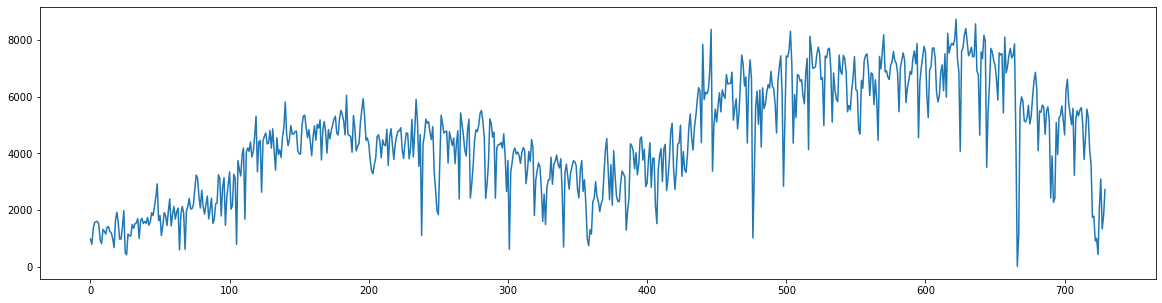

In [12]:
# trend of demand (target variable - 'cnt') over two years
plt.figure(figsize=(20,5))
plt.plot(bike.cnt)
plt.show()

<Figure size 1080x2160 with 0 Axes>

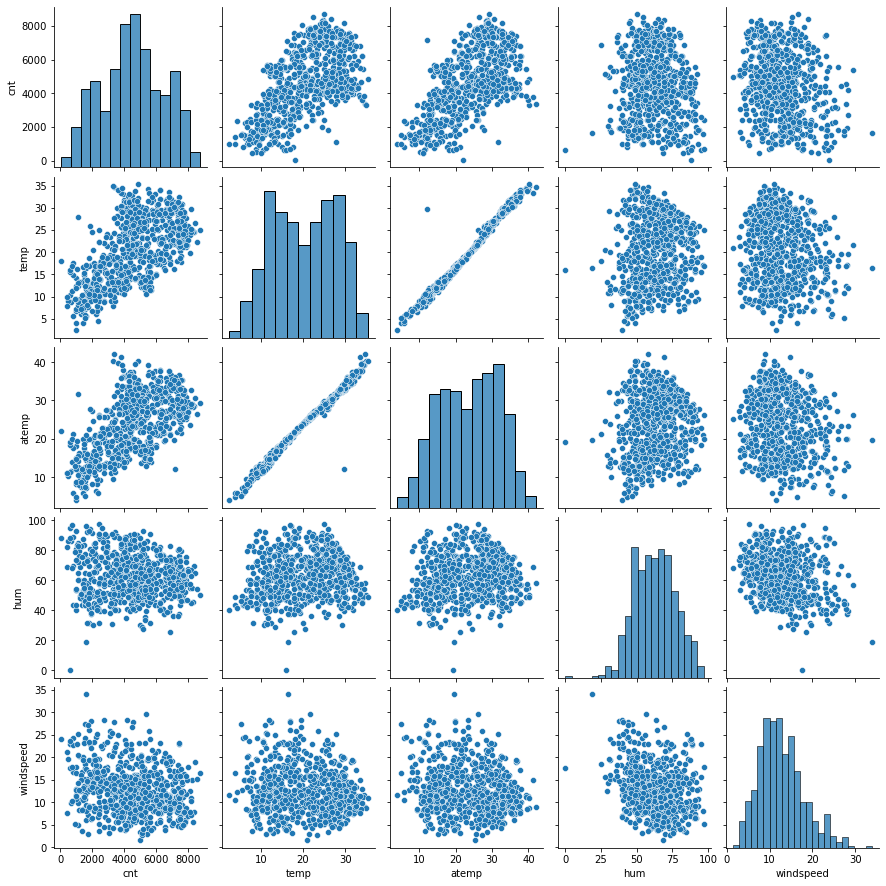

In [13]:
# Numeric Data Visualisation pairplot
plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Insight
- It seems to be that temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are also highly co-related with each other

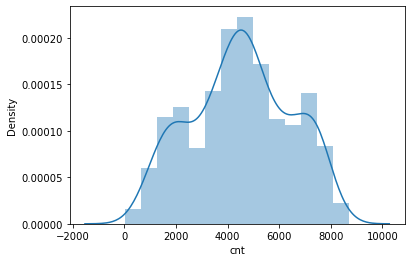

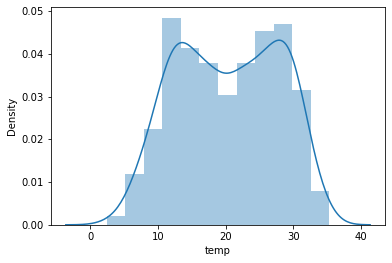

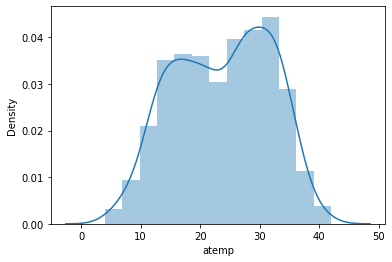

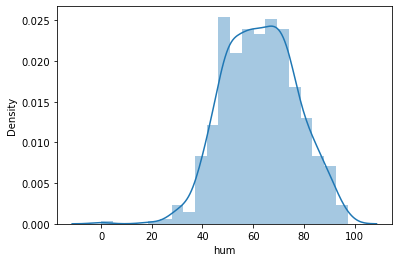

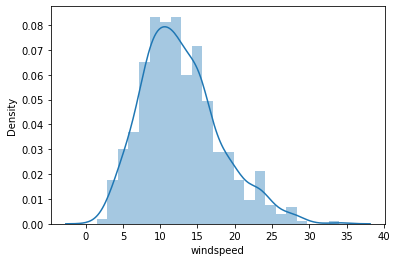

In [14]:
# Numeric Data Visualisation distplot
num_df=['cnt', 'temp', 'atemp', 'hum','windspeed']
for i in num_df:
    sns.distplot(bike[i])
    plt.show()


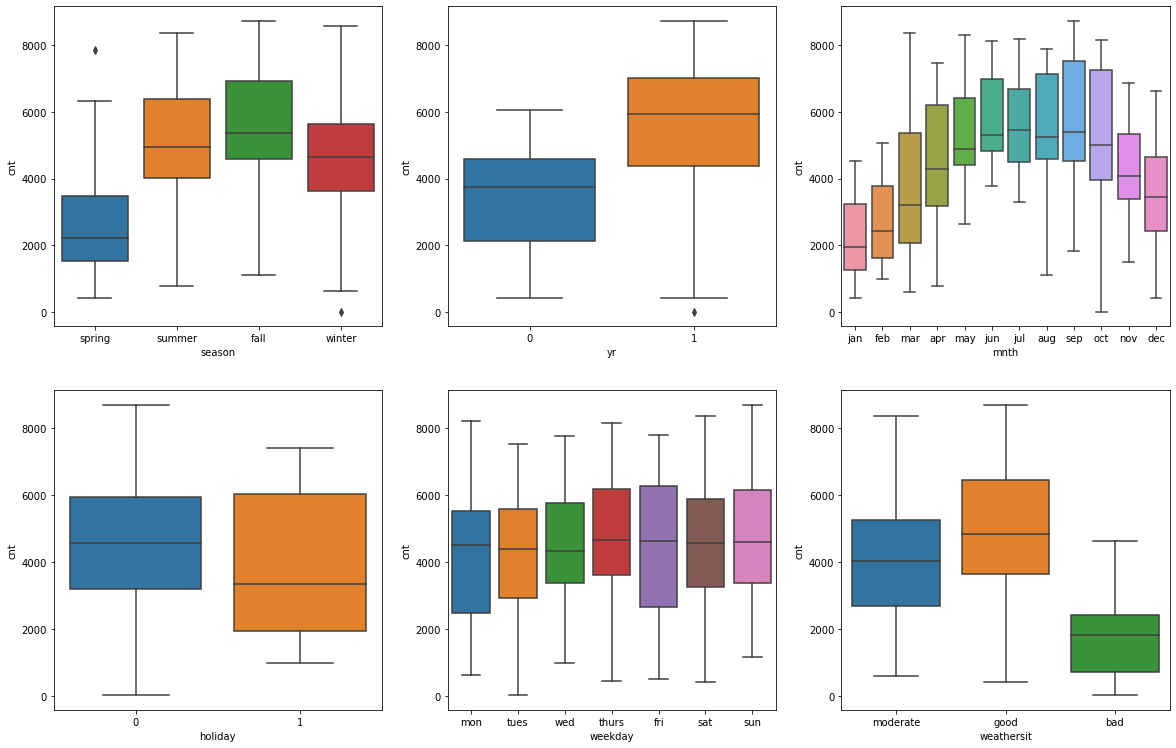

In [15]:
#visualizing categorical variables VS cnt using boxplots

plt.figure(figsize=(20,20))
plt.subplot(331)
sns.boxplot(x='season', y='cnt',data=bike)

plt.subplot(332)
sns.boxplot(x='yr', y='cnt',data=bike)

plt.subplot(333)
sns.boxplot(x='mnth', y='cnt',data=bike)

plt.subplot(334)
sns.boxplot(x='holiday', y='cnt',data=bike)

plt.subplot(335)
sns.boxplot(x='weekday', y='cnt',data=bike)

plt.subplot(336)
sns.boxplot(x='weathersit', y='cnt',data=bike)

plt.show()

### Insights:
**Numeric visualisation :**
- From above (Numeric visualisation) we can see that temp vs atemp and registered vs cnt is showing a positive linear relationship. 
- This indicates we have to drop these variables while buiding the model

**Categorical visualisation :**
- As we can see in the cnt vs season boxplot there is a hike in demand in summer and fall season.
- In 2019 there is a hike in demand of bikes.
- In the cnt vs yr boxplot you can see a increase in demand from month of may which is supposed to be a holidays for childrens and teenagers.
- Week day is not showing and inconsistency over the week.
- In cnt vs weather situation boxplot we can clearly see a drop in demand in the snow weather.

#### Drop columns that are not useful for analysis
- instant: row instance identifier.
- dteday: since mnth and year and weekday already exists.
- casual & registered variables: casual + registered = cnt, which leads to data leakage.

In [16]:
# Droping instant column as it is index column which has nothing to do with target
bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [17]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


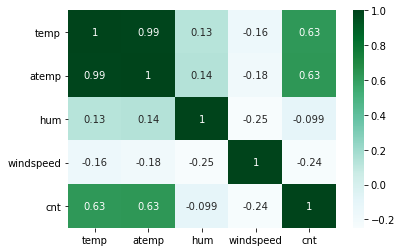

In [18]:
# Checking continuous variables relationship with each other
sns.heatmap(bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()


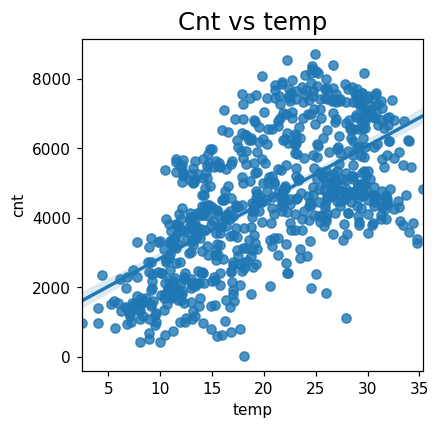

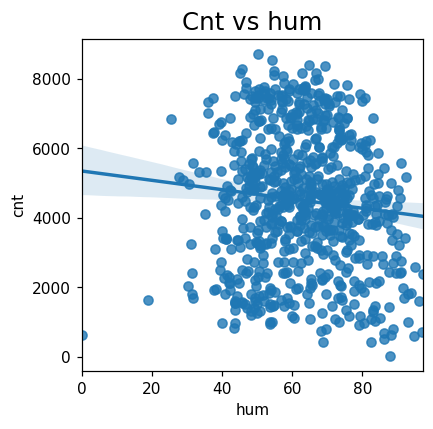

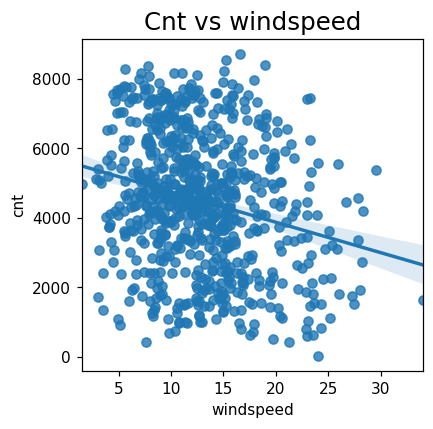

In [19]:
# Numeric Data Visualisation distplot

a_df = ['temp','hum','windspeed']

for i in a_df:
    plt.figure(figsize=(4,4),dpi=110)
    plt.title(('Cnt vs '+ i),fontsize=16)
    sns.regplot(data=bike,y="cnt",x=i)
    plt.xlabel(i)
    plt.show()

### Inference:
- It can be seen that cnt is linearly increasing with temp indicating linear relation.
- Demand for bikes is positively correlated to temp.
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.
- Windspeed is values are more scattered around.
- It can be seen that although cnt is decreasing with increase in windspeed.

## 2) Preparing the data (train-test split, rescaling etc)

### 2.1) Creating dummy variables for categorical columns 

In [20]:
# creating dummy vars for season

Season = pd.get_dummies(bike['season'], drop_first = True)
Season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [21]:
# creating dummy vars for month

month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [22]:
# creating dummy vars for weekday

Weekday = pd.get_dummies(bike['weekday'], drop_first = True)
Weekday.head()

,mon,sat,sun,thurs,tues,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [23]:
# creating dummy vars for working day

workday = pd.get_dummies(bike['workingday'], drop_first = True)
workday.head()

,1
0,1
1,1
2,1
3,1
4,1


In [24]:
# creating dummy vars for weathersit

weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head()

,good,moderate
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [25]:
# Add the results to the original housing dataframe

bike = pd.concat([bike,weather,workday,Weekday, month, Season], axis = 1)

In [26]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,0,0
1,spring,0,jan,0,tues,1,moderate,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,1,0,0
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  good        730 non-null    uint8  
 13  moderate    730 non-null    uint8  
 14  1           730 non-null    uint8  
 15  mon         730 non-null    uint8  
 16  sat         730 non-null    uint8  
 17  sun         730 non-null    uint8  
 18  thurs       730 non-null    uint8  
 19  tues        730 non-null    u

In [28]:
# Drop all columns whose dummies have been created
bike.drop(['season', 'workingday', 'weekday', 'mnth', 'weathersit'], axis = 1, inplace = True)

bike.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,good,moderate,1,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   yr         730 non-null    int64  
 1   holiday    730 non-null    int64  
 2   temp       730 non-null    float64
 3   atemp      730 non-null    float64
 4   hum        730 non-null    float64
 5   windspeed  730 non-null    float64
 6   cnt        730 non-null    int64  
 7   good       730 non-null    uint8  
 8   moderate   730 non-null    uint8  
 9   1          730 non-null    uint8  
 10  mon        730 non-null    uint8  
 11  sat        730 non-null    uint8  
 12  sun        730 non-null    uint8  
 13  thurs      730 non-null    uint8  
 14  tues       730 non-null    uint8  
 15  wed        730 non-null    uint8  
 16  aug        730 non-null    uint8  
 17  dec        730 non-null    uint8  
 18  feb        730 non-null    uint8  
 19  jan        730 non-null    uint8  
 20  jul       

### 2.2) Splitting the Data into Training and Testing Sets

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### 2.3) Rescaling the Features 

We will use MinMax scaling.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['yr','temp', 'atemp','hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,good,moderate,1,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
653,1.0,0,0.509887,0.501133,0.575354,0.300794,0.864243,1,0,1,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,1,...,1,0,0,0,0,0,0,0,0,0
426,1.0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1.0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## 3) Training the model

### 3.1) Dividing into X and Y sets for the model building

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train


In [33]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('good', True, 1),
 ('moderate', True, 1),
 (1, False, 2),
 ('mon', False, 8),
 ('sat', False, 3),
 ('sun', False, 4),
 ('thurs', False, 12),
 ('tues', False, 7),
 ('wed', False, 10),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', True, 1),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 13),
 ('mar', False, 14),
 ('may', False, 6),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'good', 'moderate', 'dec',
       'feb', 'jan', 'jul', 'nov', 'sep', 'spring', 'summer', 'winter'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['atemp',       1,   'mon',   'sat',   'sun', 'thurs',  'tues',   'wed',
         'aug',   'jun',   'mar',   'may',   'oct'],
      dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [40]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.15e-188
Time:                        19:37:39   Log-Likelihood:                 516.15
No. Observations:                 510   AIC:                            -998.3
Df Residuals:                     493   BIC:                            -926.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0825      0.048      1.725      0.0

In [41]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'good',
       'moderate', 'dec', 'feb', 'jan', 'jul', 'nov', 'sep', 'spring',
       'summer', 'winter'],
      dtype='object')

In [42]:
# dropping constant 
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [43]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,26.84
2,temp,26.41
5,good,16.07
6,moderate,9.38
13,spring,6.52
4,windspeed,4.67
15,winter,4.54
14,summer,3.31
9,jan,2.51
0,yr,2.10


In [44]:
# Dropping 'spring' since it has high VIF and high P Value
X_train_new = X_train_new.drop(['spring'], axis=1)

## Model 2

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.31e-188
Time:                        19:37:42   Log-Likelihood:                 513.31
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.045      0.930      0.3

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.46
2,temp,19.79
5,good,13.07
6,moderate,8.48
4,windspeed,4.23
14,winter,3.00
9,jan,2.30
13,summer,2.22
0,yr,2.09
11,nov,1.91


In [48]:
# Dropping 'nov' since it has a high p value
X_train_new = X_train_new.drop(['nov'], axis=1)

## Model 3

In [49]:

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          8.62e-189
Time:                        19:37:43   Log-Likelihood:                 511.00
No. Observations:                 510   AIC:                            -992.0
Df Residuals:                     495   BIC:                            -928.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.045      0.719      0.4

In [50]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.27
2,temp,18.70
5,good,12.51
6,moderate,8.27
4,windspeed,4.22
13,winter,2.44
9,jan,2.20
12,summer,2.18
0,yr,2.09
8,feb,1.67


In [51]:
# Dropping 'feb' since it has a high p value
X_train_new = X_train_new.drop(['feb'], axis=1)

## Model 4

In [52]:

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.25e-189
Time:                        19:37:44   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0107      0.043      0.246      0.8

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,20.16
2,temp,14.71
5,good,11.12
6,moderate,7.82
4,windspeed,4.13
0,yr,2.08
12,winter,2.03
11,summer,1.89
8,jan,1.74
9,jul,1.55


In [54]:
#dropping 'dec' since it has a high p value
X_train_new = X_train_new.drop(['dec'], axis=1)

## Model 5

In [55]:

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.03e-190
Time:                        19:37:45   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0081      0.043      0.187      0.8

In [56]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,19.47
2,temp,13.50
5,good,10.68
6,moderate,7.68
4,windspeed,4.12
0,yr,2.08
11,winter,2.00
10,summer,1.87
7,jan,1.65
8,jul,1.55


In [57]:
# dropping 'jan' since it has a high p value
X_train_new = X_train_new.drop(['jan'], axis=1)

## Model 6

In [58]:

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.89e-190
Time:                        19:37:47   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0074      0.043     -0.172      0.8

In [59]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,17.96
2,temp,10.63
5,good,9.75
6,moderate,7.32
4,windspeed,4.12
0,yr,2.07
9,summer,1.76
10,winter,1.71
7,jul,1.55
8,sep,1.29


In [60]:
# dropping 'hum' since it has a high VIF
X_train_new = X_train_new.drop(['hum'], axis=1)

## Model 7

In [61]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.09e-186
Time:                        19:37:48   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1604      0.030     -5.390      0.0

In [62]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,8.52
4,good,7.35
5,moderate,4.19
3,windspeed,4.05
0,yr,2.06
8,summer,1.76
6,jul,1.53
9,winter,1.51
7,sep,1.29
1,holiday,1.04


In [63]:
# Dropping 'jul' since it has a high p value
X_train_new = X_train_new.drop(['jul'], axis=1)

## Model 8

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.37e-186
Time:                        19:37:49   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1574      0.030     -5.273      0.0

In [65]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,good,7.27
2,temp,6.67
5,moderate,4.12
3,windspeed,4.04
0,yr,2.06
7,summer,1.57
8,winter,1.45
6,sep,1.20
1,holiday,1.04


In [66]:
# dropping 'good' since it has a high VIF
X_train_new = X_train_new.drop(['good'], axis=1)

## Model 9

In [67]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_rfe).fit()

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.28e-163
Time:                        19:37:51   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1228      0.019      6.538      0.0

In [68]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,yr,1.99
6,summer,1.56
4,moderate,1.45
7,winter,1.35
5,sep,1.20
1,holiday,1.03


### Conclusion of Model Building 

**We can now finalise Model 9 since it shows that all variables have low VIF and low P value** 

## 4) Residual analysis

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [69]:
y_train_cnt = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

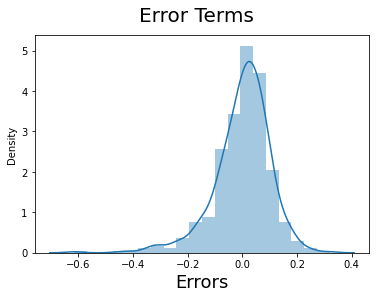

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

**Inference: Error terms of the training data look normal since it is centered around zero**

Text(0, 0.5, 'Residual')

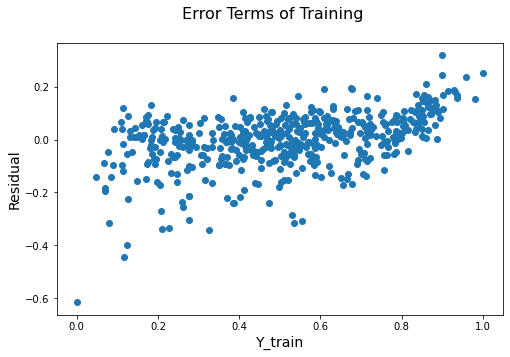

In [71]:
# Error terms
res_train = y_train - y_train_cnt
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res_train)
fig.suptitle('Error Terms of Training', fontsize=16)              # Plot heading 
plt.xlabel('Y_train', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

#### Insights:

- It seems like the corresponding residual plot is reasonably random.
- We can not detect any visible patterns
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

## 5) Predictions and evaluation on the test set

#### Applying the scaling on the test sets

In [72]:
num_vars = ['yr','temp', 'atemp','hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,good,moderate,1,mon,...,jul,jun,mar,may,nov,oct,sep,spring,summer,winter
653,1.0,0,0.509887,0.501133,0.575354,0.300794,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
576,1.0,0,0.815169,0.766351,0.725633,0.264686,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
426,1.0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
728,1.0,0,0.245101,0.200348,0.498067,0.663106,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
482,1.0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [75]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

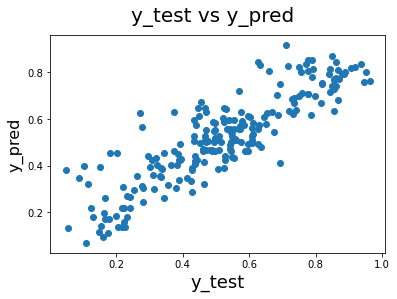

In [76]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [77]:
#Print R-squared Value
r2_score(y_test,y_pred)

0.7690313110260333

### 5.1) Residual Analysis on the test set

Text(0.5, 0, 'Errors')

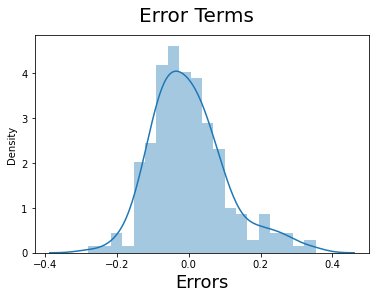

In [78]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_pred - y_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

**Inference: Error terms of prediction looks normal since it is centered around zero**

Text(0, 0.5, 'Residual')

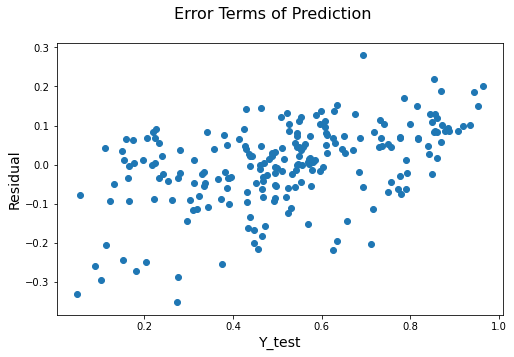

In [79]:
# Error terms
res_test = y_test - y_pred
c = [i for i in range(1,len(y_train)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms of Prediction', fontsize=16)              # Plot heading 
plt.xlabel('Y_test', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14) 

#### Insights:

- It seems like the corresponding residual plot is reasonably random.
- We can not detect any visible patterns
- Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

## 6) Summary
The company wanted to know:
  - Which variables are significant in predicting the demand for shared bikes?
  - How well those variables describe the bike demands
  
  Using the inferences and analysis presented below these posed questions have been answered.
  
### Inferences:

- R sqaured of training and testing is almost identical
- The plot of y_test and y_pred shows a linear spread
- Error terms are normally distributed and centered around zero
- The variables selscted in the finalised model are temp, windspeed, 'yr', 'summer', 'moderate', 'winter', 'sep'and 'holiday' since they showed lowest VIF and P value.
- Error terms are normally distributed and centered around zero even for the prediction set.
- We also observed that the residuals are randomly distributed for training as well as testing
- We can say with over 75% accuracy that the selected variables can help explain demand

**Analysing the above model, the comapany should focus on the following features:**
- Company should focus on expanding business during Spring and Winter, ideally during the month of November, December Jan, Feb, March, since it seems that around this period cnt was low.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- Also, since there low booking during Sping and winter which is when the wheater is between bad to severe, they could probably use this time to serive the bikes without incuring any drop in business.
- Furthermore, since it is an service that is tangible in nature and used by multiple consumers, by keeping in mind market trends, the company should incorporate sanitation of the bikes which will boost customer confidence in the service.

